# Ultrafast Cardiac Imaging Using Deep Learning

In [1]:
from utils import *
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Loading image data and grids

In [2]:
data_3dw = load_h5('data/data_iq_3dw.h5') # 3 steered DWs
data_ref = load_h5('data/data_iq_ref.h5') # reference, i.e. compounding of 31 DWs fired at a frozen time
grid_z = load_h5('data/grid_z.h5')
grid_x = load_h5('data/grid_x.h5')

# Standard compounding using 3 DWS, and 31 DWs fired as a frozen time

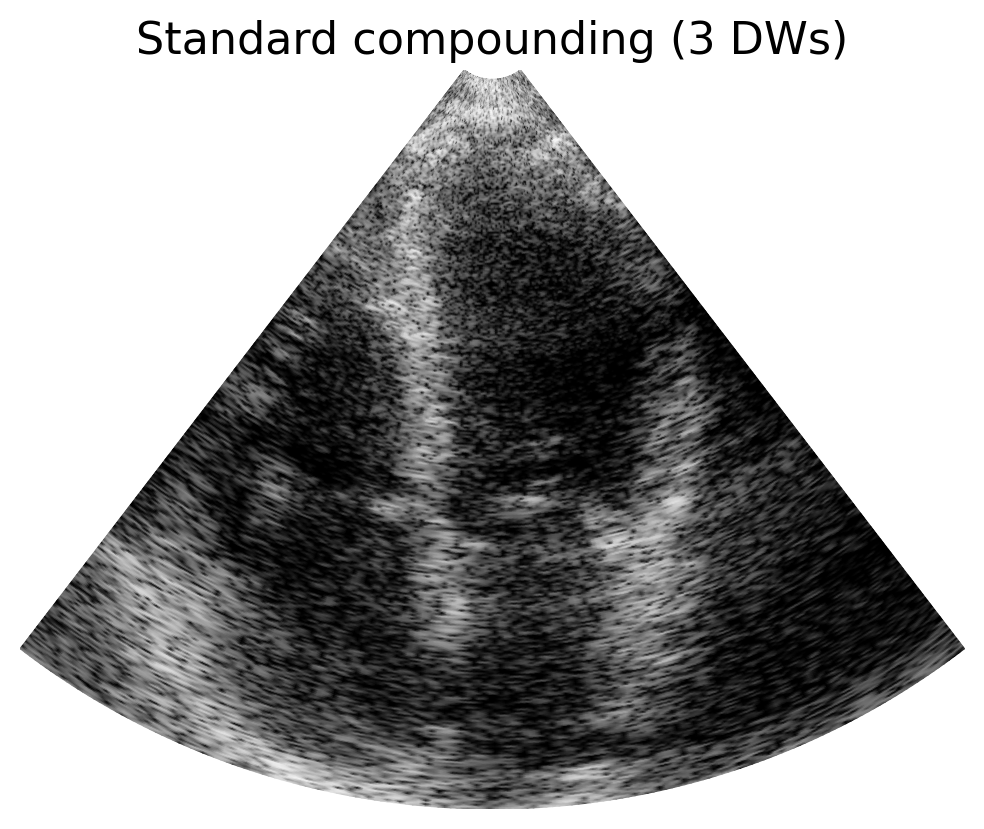

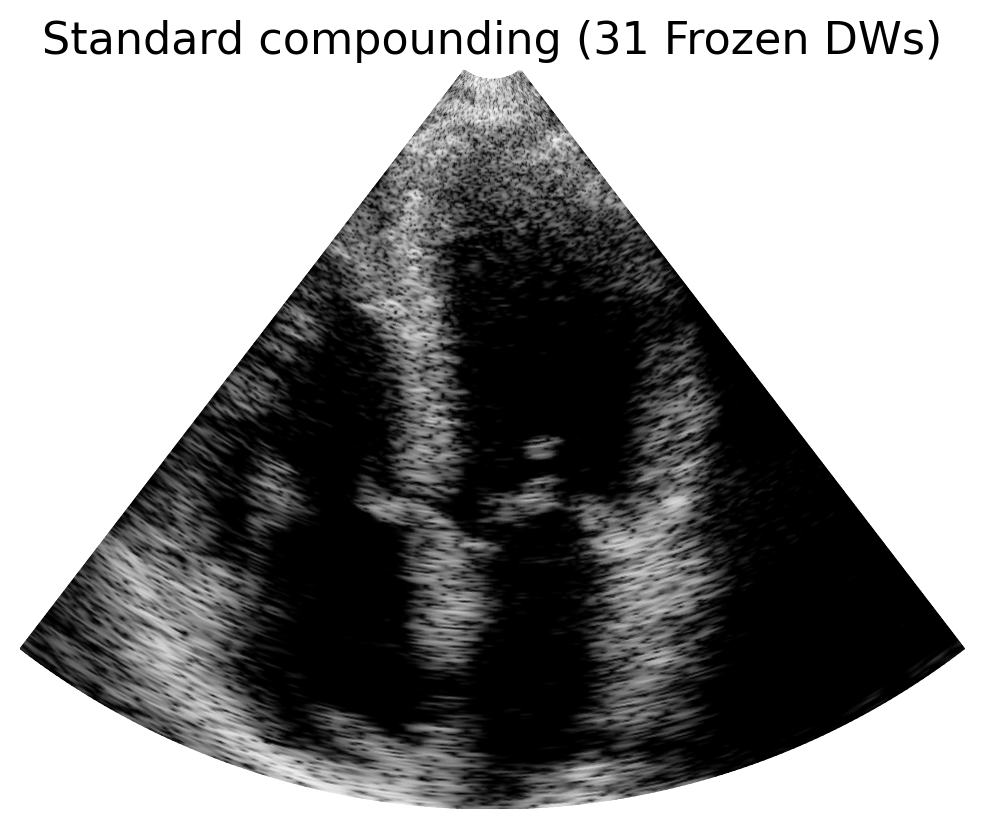

In [3]:
data_3dw_compounding = np.mean(data_3dw, axis=0) # compounding 3 steering DWs
BMode_03_DW = bmode(data_3dw_compounding, 60)
BMode_31_DW = bmode(data_ref, 60)
display(grid_x, grid_z, BMode_03_DW, 'Standard compounding (3 DWs)')
display(grid_x, grid_z, BMode_31_DW, 'Standard compounding (31 Frozen DWs)')

# Symmetry padding to the input data
## <font color='blue'>The model was trained using images with a fixed physical and digital dimension. 
## <font color='blue'> In order to deal with the varying depth and angular aperture of the simulated data, we complement the smaller images in the lateral and deep regions. 

In [4]:
data_3dw_padding, shape_info = symmetry_padding(data_3dw, shape=(480, 192))

Down padding 80, Original depth 400, Current depth 480
Left padding 16, Original width 160, Current width 176
Right padding 16, Original width 176, Current width 192


# Inference with deep learning model

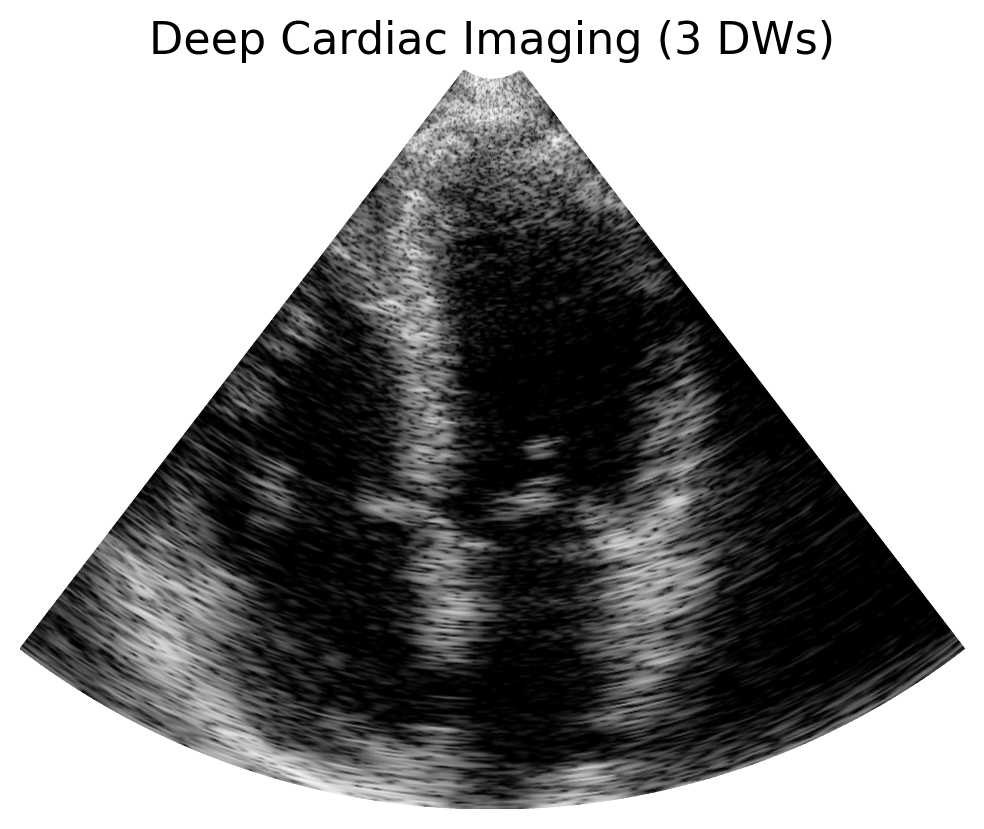

In [5]:
model = 'model/model.onnx'
data_cnn_padding = inference(model, data_3dw_padding) # CNN reconstruction using 3 steering angless
data_cnn = recover_shape(data_cnn_padding, shape_info) # recover to original data shape
BMode_CNN = bmode(data_cnn, DR=60)
display(grid_x, grid_z, BMode_CNN, 'Deep Cardiac Imaging (3 DWs)')